In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")

In [ ]:
def generate_data(N):
    return np.concatenate(
        (np.random.uniform(low=-1, size=(N, 2)),
         np.ones(N).reshape(N, 1)),
        axis=1)


def define_line():
    x = np.random.uniform(low=-1, size=(2, 2))
    m = (x[0][1] - x[1][1]) / (x[0][0] - x[1][0])
    coeff_vector = np.array([-m, 1, m*x[0][0] - x[0][1]])

    return coeff_vector


def create_dataframe(x, coeff_vector):
    df = pd.DataFrame(data=x, columns=['x', 'y', 'bias'])
    df['class'] = np.sign(df[['x', 'y', 'bias']].values @ coeff_vector)

    return df

In [34]:
x = generate_data(10)

In [35]:
g = define_line()

In [36]:
print(g)

[1.12503229 1.         0.22596144]


In [37]:
df = create_dataframe(x, g)

(-1, 1)

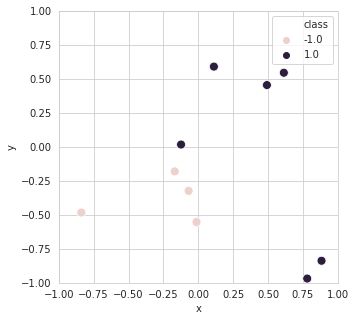

In [38]:
xx = np.linspace(-1, 1, 100)

plt.figure(figsize=(5, 5))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

sns.scatterplot(x='x', y='y', data=df, hue='class', legend='full', s=80)
# sns.lineplot(xx, g(xx))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

---

In [1]:
from ipyparallel import Client
import numpy as np

In [2]:
rc = Client()

In [3]:
print(rc.ids)

[0, 1, 2, 3]


In [4]:
dv = rc[:]

In [16]:
def run_experiment(run_id, N):
    """
    Awesome function description goes here
    """
    import numpy as np
    import pandas as pd
    
###########################################
    def generate_data(N):
        return np.concatenate(
            (np.random.uniform(low=-1, size=(N, 2)),
             np.ones(N).reshape(N, 1)),
            axis=1)


    def define_line():
        x = np.random.uniform(low=-1, size=(2, 2))
        m = (x[0][1] - x[1][1]) / (x[0][0] - x[1][0])
        coeff_vector = np.array([-m, 1, m*x[0][0] - x[0][1]])

        return coeff_vector


    def create_dataframe(x, coeff_vector):
        df = pd.DataFrame(data=x, columns=['x', 'y', 'bias'])
        df['class'] = np.sign(df[['x', 'y', 'bias']].values @ coeff_vector)

        return df
###########################################

    it = 0
    w = np.zeros(3)
    h = lambda x, w: np.sign(x @ w)

    x = generate_data(N)
    g = define_line()
    df = create_dataframe(x, g)

    while True:
        y_pred = h(df[['x', 'y', 'bias']], w)
        check_y_pred_vs_y_true = np.equal(y_pred, df['class'].values)
        wrong_examples = np.where(check_y_pred_vs_y_true == False)[0]

        if wrong_examples.shape[0] == 0:
            test_points = generate_data(1000)
            y_true = h(test_points, g)
            y_pred = h(test_points, w)
            
            mistmatch_prob = np.mean(y_true != y_pred)
            
            return [it, mistmatch_prob]

        random_example_idx = np.random.choice(wrong_examples)
        random_example = df[['x', 'y', 'bias']].iloc[random_example_idx]

        w += random_example.values * df['class'].iloc[random_example_idx]
        it += 1

In [19]:
runs = 1000

res = dv.map_async(run_experiment, np.arange(runs), [10]*runs)
x = res.get()

In [20]:
df = pd.DataFrame(data=x, columns=['iterations', 'misclassified_rate'])
df.mean(axis=0)

iterations            10.498000
misclassified_rate     0.104789
dtype: float64

In [21]:
res = dv.map_async(run_experiment, np.arange(runs), [100]*runs)
x = res.get()

In [22]:
df = pd.DataFrame(data=x, columns=['iterations', 'misclassified_rate'])
df.mean(axis=0)

iterations            119.486000
misclassified_rate      0.013261
dtype: float64